In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [4]:
import pandas as pd
df = pd.read_csv('heart_attack_prediction_dataset.csv')
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [6]:
df = df[['Heart Attack Risk', 'Sex', 'Age']]
df1 = pd.read_csv('heart_attack_prediction_dataset.csv')
df1['Sex'] = df1['Sex'].map({'Male': 0, 'Female': 1})  # convert to numeric
df1.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,0,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,0,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,1,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,0,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,0,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [7]:
df1[['Systolic', 'Diastolic']] = df1['Blood Pressure'].str.split('/', expand=True)
df1['Systolic'] = pd.to_numeric(df1['Systolic'], errors='coerce')
df1['Diastolic'] = pd.to_numeric(df1['Diastolic'], errors='coerce')

In [8]:
df1.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
0,BMW7812,67,0,208,158/88,72,0,0,1,0,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,CZE1114,21,0,389,165/93,98,1,1,1,1,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,BNI9906,21,1,324,174/99,72,1,0,0,0,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,JLN3497,84,0,383,163/100,73,1,1,1,0,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,GFO8847,66,0,318,91/88,93,1,1,1,1,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


In [23]:
X = df1[['Systolic','Diastolic']]
y = df1['Heart Attack Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [24]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1125    0]
 [ 628    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753



C:\Users\sudha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sudha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sudha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

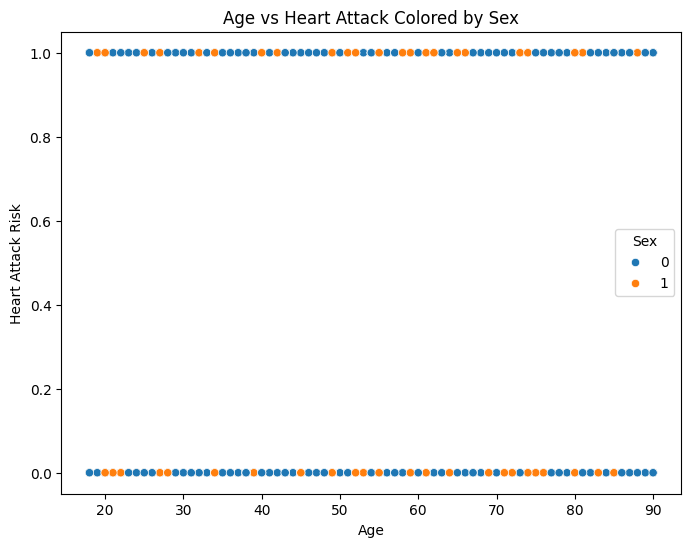

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Heart Attack Risk', hue='Sex', data=df1)
plt.title('Age vs Heart Attack Colored by Sex')
plt.xlabel('Age')
plt.ylabel('Heart Attack Risk')
plt.show()

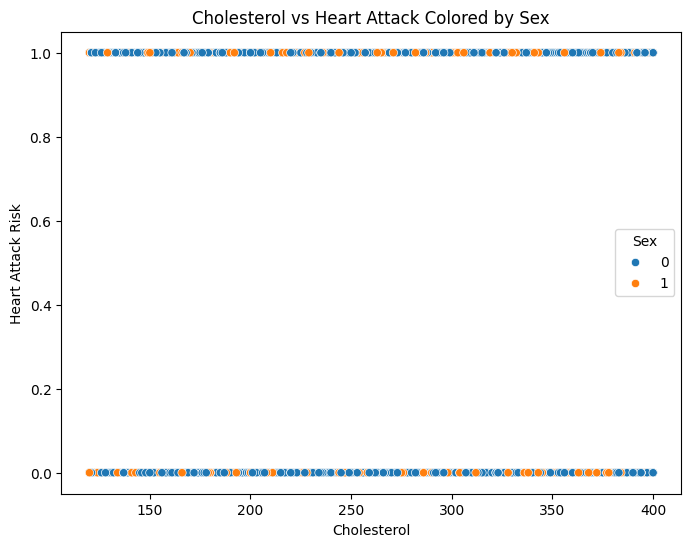

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Cholesterol', y='Heart Attack Risk', hue='Sex', data=df1)
plt.title('Cholesterol vs Heart Attack Colored by Sex')
plt.xlabel('Cholesterol')
plt.ylabel('Heart Attack Risk')
plt.show()

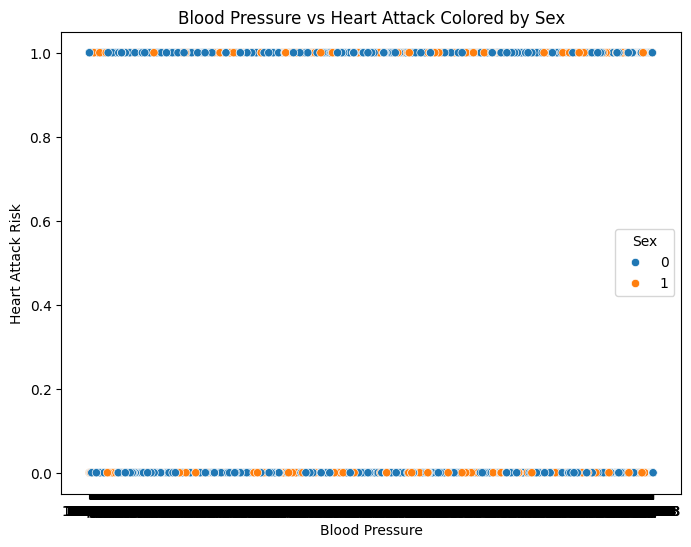

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Blood Pressure', y='Heart Attack Risk', hue='Sex', data=df1)
plt.title('Blood Pressure vs Heart Attack Colored by Sex')
plt.xlabel('Blood Pressure')
plt.ylabel('Heart Attack Risk')
plt.show()

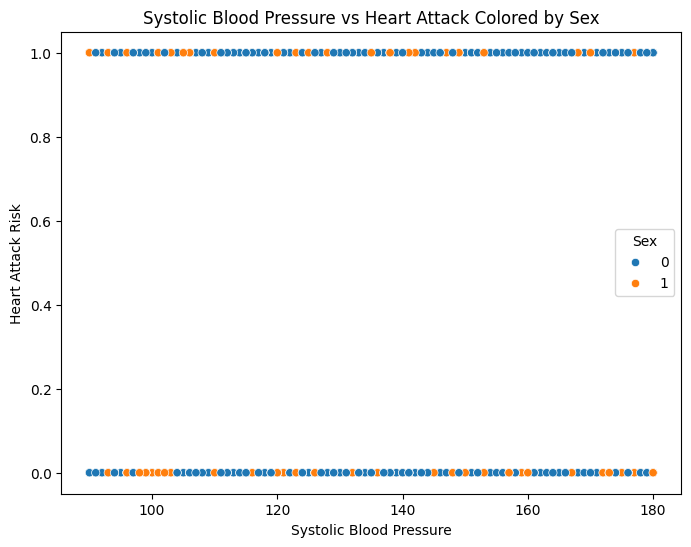

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Systolic', y='Heart Attack Risk', hue='Sex', data=df1)
plt.title('Systolic Blood Pressure vs Heart Attack Colored by Sex')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Heart Attack Risk')
plt.show()

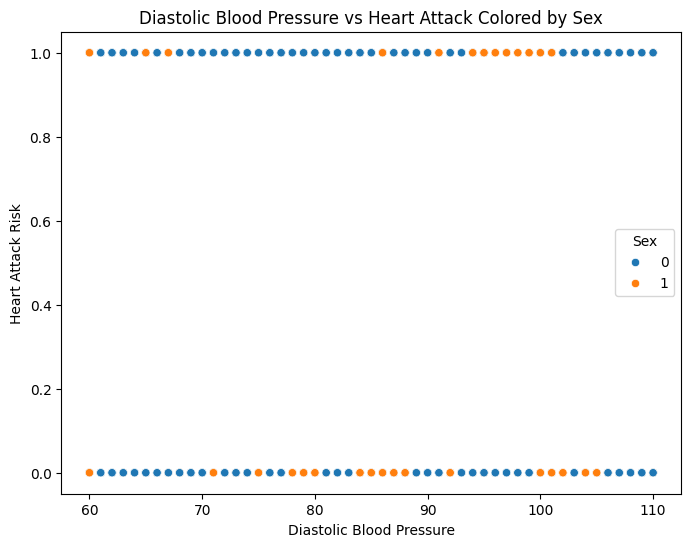

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Diastolic', y='Heart Attack Risk', hue='Sex', data=df1)
plt.title('Diastolic Blood Pressure vs Heart Attack Colored by Sex')
plt.xlabel('Diastolic Blood Pressure')
plt.ylabel('Heart Attack Risk')
plt.show()

In [54]:
df1['Systolic'].describe()

count    8763.000000
mean      135.075659
std        26.349976
min        90.000000
25%       112.000000
50%       135.000000
75%       158.000000
max       180.000000
Name: Systolic, dtype: float64